In [1]:
!pip install brian2

In [2]:
from brian2 import *
%matplotlib inline

In [3]:
tau_pre = tau_post = 10*ms
Apre = 0.01
Apost = -Apre*tau_pre/tau_post*1.05
time_max = 60*ms
N = 10

In [4]:
G = NeuronGroup(N, 'tspike:second', threshold='t>tspike', refractory=100*ms)
H = NeuronGroup(N, 'tspike:second', threshold='t>tspike', refractory=100*ms)
G.tspike = 'i*time_max/(N-1)'
H.tspike = '(N-1-i)*time_max/(N-1)'

In [5]:
S = Synapses(G, H,
             '''
             w : 1
             dapre/dt = -apre/tau_pre : 1 (event-driven)
             dapost/dt = -apost/tau_post : 1 (event-driven)
             ''',
             on_pre='''
             apre = apre + Apre
             w = w + apost
             ''',
             on_post='''
             apost = apost + Apost
             w = w + apre
             ''')
S.connect(j='i')

run(time_max+1*ms)

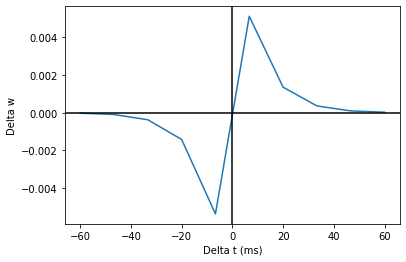

In [6]:
plt.plot((H.tspike-G.tspike)/ms, S.w)
plt.xlabel('Delta t (ms)')
plt.ylabel('Delta w')
plt.axhline(0, ls='-' , c = 'k')
plt.axvline(0, ls='-' , c = 'k')
plt.show()

In [7]:
tau_pre = tau_post = 10*ms
Apre = 0.01
Apost = -Apre*tau_pre/tau_post*1.05
time_max = 60*ms
N = 50

In [8]:
G = NeuronGroup(N, 'tspike:second', threshold='t>tspike', refractory=100*ms)
H = NeuronGroup(N, 'tspike:second', threshold='t>tspike', refractory=100*ms)
G.tspike = 'i*time_max/(N-1)'
H.tspike = '(N-1-i)*time_max/(N-1)'

In [9]:
S = Synapses(G, H,
             '''
             w : 1
             dapre/dt = -apre/tau_pre : 1 (event-driven)
             dapost/dt = -apost/tau_post : 1 (event-driven)
             ''',
             on_pre='''
             apre = apre + Apre
             w = w + apost
             ''',
             on_post='''
             apost = apost + Apost
             w = w + apre
             ''')
S.connect(j='i')

run(time_max+1*ms)

In [10]:
import matplotlib.pyplot as plt

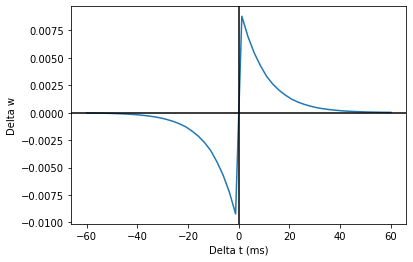

In [11]:
plt.plot((H.tspike-G.tspike)/ms, S.w)
plt.xlabel('Delta t (ms)')
plt.ylabel('Delta w')
plt.axhline(0, ls='-' , c = 'k')
plt.axvline(0, ls='-' , c = 'k')
plt.show()

In [12]:
tau_pre = tau_post = 10*ms
Apre = 0.01
Apost = -Apre*tau_pre/tau_post*1.05
time_max = 60*ms
N = 100

In [13]:
G = NeuronGroup(N, 'tspike:second', threshold='t>tspike', refractory=100*ms)
H = NeuronGroup(N, 'tspike:second', threshold='t>tspike', refractory=100*ms)
G.tspike = 'i*time_max/(N-1)'
H.tspike = '(N-1-i)*time_max/(N-1)'

In [14]:
S = Synapses(G, H,
             '''
             w : 1
             dapre/dt = -apre/tau_pre : 1 (event-driven)
             dapost/dt = -apost/tau_post : 1 (event-driven)
             ''',
             on_pre='''
             apre = apre + Apre
             w = w + apost
             ''',
             on_post='''
             apost = apost + Apost
             w = w + apre
             ''')
S.connect(j='i')

run(time_max+1*ms)

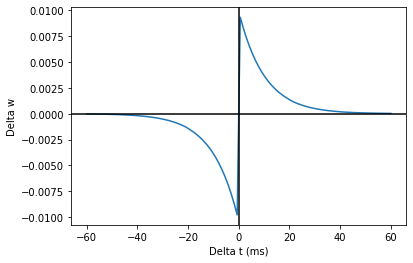

In [15]:
plt.plot((H.tspike-G.tspike)/ms, S.w)
plt.xlabel('Delta t (ms)')
plt.ylabel('Delta w')
plt.axhline(0, ls='-' , c = 'k')
plt.axvline(0, ls='-' , c = 'k')
plt.show()

In [16]:
tau_pre = tau_post = 50*ms
Apre = 0.01
Apost = -Apre*tau_pre/tau_post*1.05
time_max = 60*ms
N = 100

In [17]:
G = NeuronGroup(N, 'tspike:second', threshold='t>tspike', refractory=100*ms)
H = NeuronGroup(N, 'tspike:second', threshold='t>tspike', refractory=100*ms)
G.tspike = 'i*time_max/(N-1)'
H.tspike = '(N-1-i)*time_max/(N-1)'

In [18]:
S = Synapses(G, H,
             '''
             w : 1
             dapre/dt = -apre/tau_pre : 1 (event-driven)
             dapost/dt = -apost/tau_post : 1 (event-driven)
             ''',
             on_pre='''
             apre = apre + Apre
             w = w + apost
             ''',
             on_post='''
             apost = apost + Apost
             w = w + apre
             ''')
S.connect(j='i')

run(time_max+1*ms)

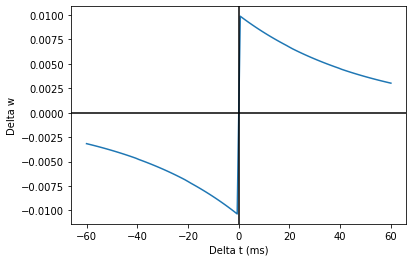

In [19]:
plt.plot((H.tspike-G.tspike)/ms, S.w)
plt.xlabel('Delta t (ms)')
plt.ylabel('Delta w')
plt.axhline(0, ls='-' , c = 'k')
plt.axvline(0, ls='-' , c = 'k')
plt.show()

In [22]:
import random
inp_N   = 10
out_N   = 2
v_rest                     = -70 * mV
v_reset                    = [-65 * mV, -64*mV]
firing_threshold           = [-50 * mV, -48*mV]
membrane_time_scale        = 8.  * ms

taupre = taupost = 80*ms
Apre = 0.01
Apost = -Apre*taupre/taupost*1.01


eqs = """
    dv/dt = (-(v-v_rest))/ membrane_time_scale : volt
    firing_threshold : volt
    v_reset : volt
    """


indices = array([0,2,4,6,8])
times = array([0,1,1,0,2])*ms



input_layer     = SpikeGeneratorGroup(inp_N, indices, times)
output_layer    = NeuronGroup(out_N,  eqs, threshold='v>=firing_threshold', reset='v=v_reset', method='linear')
output_layer.firing_threshold = firing_threshold
output_layer.v_reset = v_reset

syn = Synapses(input_layer, output_layer, '''
            w : 1
            dapre/dt  = -apre /taupre  : 1 (event-driven)
            dapost/dt = -apost/taupost : 1 (event-driven)
            ''',
            on_pre='''
            v_post += 5*w*mV
            apre += Apre
            w = w+apost
            ''',
            on_post='''             
            apost += Apost
            w = w+apre
            ''')
syn.connect(p=1)
syn.w = [rand() for i in range(20)]

synapse_mon     = StateMonitor(syn, ['w', 'apost', 'apre', 'v_post'] , record=True)
out_mon         = StateMonitor(output_layer, 'v', record=True)
out_spike_mon   = SpikeMonitor(output_layer)
in_spike_mon    = SpikeMonitor(input_layer)

run(times[-1])

plot(synapse_mon.t, synapse_mon.apost[0].T, label='apost')
plot(synapse_mon.t, synapse_mon.apre[0].T, label='apre')
legend()
show()


fig, axs = plt.subplots(2, 3)
axs[0, 0].plot(out_mon.t, out_mon.v[0].T, label='neuron 1')
axs[0, 0].set_title("output layer potential")
axs[0, 0].legend()
axs[1, 0].plot(out_mon.t, out_mon.v[1].T, label='neuron 2')
axs[1, 0].set_title("output layer potential")
axs[1, 0].legend()
for i in range(10):
    axs[0, 1].plot(synapse_mon.t, synapse_mon.w[i].T, label='neuron 1')
axs[0, 1].set_title("synaptic weights / neuron 1")
for i in range(10,20):
    axs[1, 1].plot(synapse_mon.t, synapse_mon.w[i].T, label='neuron 1')
axs[1, 1].set_title("synaptic weights / neuron 2")
axs[0, 2].plot(out_spike_mon.t, out_spike_mon.i, '.k')
axs[0, 2].set_title("output layer spikes")
axs[1, 2].plot(in_spike_mon.t, in_spike_mon.i, '.k')
axs[1, 2].set_title("input layer spikes")

show()
quit()

MagicError: ignored